<a href="https://colab.research.google.com/github/abhigattu/sml/blob/main/2303A52469(stml_Project)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
d=pd.read_csv("/content/Myocardial infarction complications Database.csv")
print(d.head())

   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   
4         0.0  ...          0           0         0          0       0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0         0    0       0          0       0  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
d=d.fillna(0)
print(d.isnull().sum())

ID           0
AGE          0
SEX          0
INF_ANAM     0
STENOK_AN    0
            ..
DRESSLER     0
ZSN          0
REC_IM       0
P_IM_STEN    0
LET_IS       0
Length: 124, dtype: int64


In [ ]:
X=d.drop('LET_IS',axis=1)
mle_params={}
Y=d["LET_IS"]
print("target:")
print(Y.head())
print("shape:",Y.shape)
print("features:")
print(X.head())

target:
0    0
1    0
2    0
3    0
4    0
Name: LET_IS, dtype: int64
shape: (1700,)
features:
   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       0.0  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       0.0  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       0.0  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       0.0  3.0   

   SIM_GIPERT  ...  PREDS_TAH  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
0         0.0  ...          0          0           0         0          0   
1         0.0  ...          0          0           0         0          0   
2         0.0  ...          0          0           0         0          0   
3         0.0  ...          0          0           0         0          0   
4         0.0  ...          0          0           0     

In [ ]:
S=X.replace({'NaN':1})
print(S)

        ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
0        1  77.0    1       2.0        1.0        1.0       2.0       0.0   
1        2  55.0    1       1.0        0.0        0.0       0.0       0.0   
2        3  52.0    1       0.0        0.0        0.0       2.0       0.0   
3        4  68.0    0       0.0        0.0        0.0       2.0       0.0   
4        5  60.0    1       0.0        0.0        0.0       2.0       0.0   
...    ...   ...  ...       ...        ...        ...       ...       ...   
1695  1696  77.0    0       0.0        4.0        2.0       1.0       0.0   
1696  1697  70.0    0       0.0        6.0        2.0       1.0       0.0   
1697  1698  55.0    1       3.0        6.0        2.0       2.0       0.0   
1698  1699  79.0    0       2.0        2.0        2.0       1.0       0.0   
1699  1700  63.0    1       2.0        0.0        0.0       0.0       0.0   

       GB  SIM_GIPERT  ...  PREDS_TAH  JELUD_TAH  FIBR_JELUD  A_V_BLOK  \
0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(S, Y , test_size=0.2, random_state=30)
print("X_train:",X_train)
print("X_test:",X_test)
print("Y_train:",y_train)
print("Y_train:",y_test)

X_train:         ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
1639  1640  57.0    0       0.0        0.0        0.0       0.0       0.0   
1124  1125  58.0    1       0.0        0.0        0.0       0.0       0.0   
369    370  45.0    1       0.0        5.0        1.0       2.0       0.0   
1037  1038  55.0    1       1.0        0.0        0.0       2.0       0.0   
1059  1060  68.0    1       0.0        5.0        2.0       1.0       0.0   
...    ...   ...  ...       ...        ...        ...       ...       ...   
919    920  58.0    1       0.0        3.0        2.0       1.0       0.0   
1164  1165  51.0    1       0.0        0.0        0.0       2.0       0.0   
500    501  75.0    0       1.0        5.0        3.0       2.0       0.0   
941    942  52.0    1       3.0        5.0        2.0       1.0       0.0   
421    422  65.0    1       0.0        3.0        2.0       2.0       0.0   

       GB  SIM_GIPERT  ...  PREDS_TAH  JELUD_TAH  FIBR_JELUD  A_V_

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
lr=LR.fit(X_train,y_train)
print("coefficient:",lr.coef_)
print("intercept:",lr.intercept_)

coefficient: [[-6.26046943e-03  1.09594502e-01  1.01817272e-02  1.59159398e-03
   4.17799101e-03  5.39868124e-03  5.83507306e-03  3.77568512e-04
  -3.97715008e-03  1.51020491e-04 -1.33733594e-02 -4.76644863e-03
   6.67380681e-04 -3.63477783e-05 -2.38065089e-04  1.77561359e-04
  -9.94586423e-04  3.99490646e-05  5.37180500e-05 -1.40568977e-04
  -1.21119802e-04  6.40825065e-05  1.45783547e-06 -2.62250500e-05
   2.35170891e-05  4.61768494e-05 -9.66563353e-04 -1.53762620e-04
   1.72708586e-04 -2.32270292e-04  1.90064543e-04 -7.92922048e-05
   1.31817425e-04  2.93502292e-04 -1.11847432e-02  2.07595547e-02
   5.50892345e-03  2.00892918e-02 -1.26263052e-03 -8.03855261e-04
  -1.61292100e-03  4.97632659e-05  1.01995379e-04  1.29796206e-04
   2.79841759e-03  4.74961581e-03  3.66656003e-03  1.73440004e-03
  -6.70761792e-04  6.71187450e-03 -1.61640699e-03 -1.02030828e-04
   1.59904382e-05 -2.01790563e-03  1.83807394e-04 -6.83531881e-04
   4.88552705e-05  3.46364021e-04 -4.00810401e-04 -1.10742553e-

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = lr.predict(X_train)
print("accuracy:",accuracy_score(y_train, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_train,y_pred))
print("classification report:")
print(classification_report(y_train,y_pred))

accuracy: 0.861764705882353
confusion matrix:
[[1110   32    0    2    0    0    0    2]
 [  28   61    0    1    0    0    0    0]
 [   9    7    0    0    0    0    0    0]
 [  32    9    0    1    0    0    0    0]
 [  11    6    0    0    0    0    0    0]
 [   7    4    0    0    0    0    0    0]
 [  15    3    0    0    0    0    0    0]
 [   9    9    0    2    0    0    0    0]]
classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1146
           1       0.47      0.68      0.55        90
           2       0.00      0.00      0.00        16
           3       0.17      0.02      0.04        42
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        20

    accuracy                           0.86      1360
   macro avg       0.19      0.21      0.19 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC
SV= SVC()
sv=SV.fit(X_train,y_train)
print("intercept:",sv.intercept_)

intercept: [ 0.28480946  0.76333158  0.20439715  0.60196496  0.89070758  0.5450381
  0.68660447  0.98656119  0.71634933  0.98909554  1.01137785  1.00613358
  0.99696947 -1.00876784 -0.74556699  1.00665832 -0.60372004 -0.80511639
  1.01268916  1.02782827  1.01727549  1.02007287  1.00391576 -0.86251181
 -0.89493688 -0.9590818  -1.00241831 -0.93478683]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = sv.predict(X_train)
print("accuracy:",accuracy_score(y_train, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_train,y_pred))
print("classification report:")
print(classification_report(y_train,y_pred))

accuracy: 0.8948529411764706
confusion matrix:
[[1144    2    0    0    0    0    0    0]
 [  17   73    0    0    0    0    0    0]
 [   6   10    0    0    0    0    0    0]
 [   6   36    0    0    0    0    0    0]
 [   1   16    0    0    0    0    0    0]
 [   2    9    0    0    0    0    0    0]
 [   2   16    0    0    0    0    0    0]
 [   3   17    0    0    0    0    0    0]]
classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1146
           1       0.41      0.81      0.54        90
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        20

    accuracy                           0.89      1360
   macro avg       0.17      0.23      0.19

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import Perceptron
PR= Perceptron()
pr=PR.fit(X_train,y_train)
print("intercept:",pr.intercept_)
print("coefficient:",pr.coef_)

intercept: [ 519. -203.  -35. -225.  -48.  -29.  -41.  -64.]
coefficient: [[-1.82300e+03  1.97000e+04  6.08000e+02  1.90000e+02  7.60000e+02
   5.32000e+02  4.57000e+02  1.20000e+01 -4.60000e+01 -5.00000e+00
  -3.04000e+02 -4.08000e+02  6.20000e+01  1.00000e+00 -2.40000e+01
   5.10000e+01 -7.20000e+01  3.00000e+00  1.00000e+00 -9.00000e+00
  -1.00000e+01  2.00000e+00  1.00000e+00 -1.00000e+00  0.00000e+00
   8.00000e+00 -4.60000e+01 -2.10000e+01  1.60000e+01  9.00000e+00
  -4.00000e+00  3.00000e+00  1.60000e+01  2.20000e+01 -9.30000e+02
   1.16000e+03  7.32000e+03  6.26000e+03 -8.00000e+01 -1.20000e+02
  -1.26000e+02  1.60000e+01  6.00000e+00 -9.00000e+00  8.90000e+01
   2.80000e+02  3.47000e+02  9.70000e+01 -6.20000e+01  4.82000e+02
  -1.27000e+02  0.00000e+00  0.00000e+00 -2.08000e+02  1.60000e+01
  -3.40000e+01  7.00000e+00  5.00000e+01 -6.40000e+01 -7.40000e+01
  -6.50000e+01  1.00000e+01  0.00000e+00  7.00000e+00  7.00000e+00
  -4.60000e+01  2.00000e+00  1.10000e+01 -2.70000e+01 -

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = pr.predict(X_train)
print("accuracy:",accuracy_score(y_train, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_train,y_pred))
print("classification report:")
print(classification_report(y_train,y_pred))

accuracy: 0.8470588235294118
confusion matrix:
[[1108   38    0    0    0    0    0    0]
 [  46   44    0    0    0    0    0    0]
 [  11    5    0    0    0    0    0    0]
 [  39    3    0    0    0    0    0    0]
 [  16    1    0    0    0    0    0    0]
 [  10    1    0    0    0    0    0    0]
 [  17    1    0    0    0    0    0    0]
 [  17    3    0    0    0    0    0    0]]
classification report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1146
           1       0.46      0.49      0.47        90
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        20

    accuracy                           0.85      1360
   macro avg       0.17      0.18      0.17

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
kn = KNeighborsClassifier()
KN=kn.fit(X_train,y_train)
y_pred=KN.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred))
print("confusion_matrix:",confusion_matrix(y_test,y_pred))
print("classification_report:",classification_report(y_test,y_pred))

accuracy: 0.888235294117647
confusion_matrix: [[282   1   0   0   0   0   0   0]
 [  0  16   0   2   1   0   0   1]
 [  1   0   0   0   0   0   1   0]
 [  1   7   1   3   0   0   0   0]
 [  1   3   0   1   1   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  1   6   0   2   0   0   0   0]
 [  1   4   0   1   1   0   0   0]]
classification_report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       283
           1       0.42      0.80      0.55        20
           2       0.00      0.00      0.00         2
           3       0.33      0.25      0.29        12
           4       0.33      0.17      0.22         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         7

    accuracy                           0.89       340
   macro avg       0.26      0.28      0.26       340
weighted avg       0.86      0.89      0.87       340


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.svm import SVC
ss = SVC()
mm=ss.fit(X_train_pca,y_train)
print("intercept:",mm.intercept_)

intercept: [ 0.63622679  0.66651279  0.58300492  0.63790286  0.76054984  0.76393652
  0.71236785  1.00518127  0.34661614  0.9916953   1.00493748  1.00437828
  1.00305207 -0.99124704 -0.48558888  1.05377923  0.02295253 -0.47517163
  1.00272833  1.00638122  1.00327534  0.99976459  1.02286378 -0.47468388
 -0.56361112 -0.81381204 -0.97590992 -0.64429396]


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = mm.predict(X_train_pca)
print("accuracy:",accuracy_score(y_train, y_pred))

accuracy: 0.9007352941176471


In [ ]:
from sklearn.linear_model import LogisticRegression
ss = LogisticRegression()
mm=ss.fit(X_train_pca,y_train)
print("coefficient:",mm.coef_)
print("intercept:",mm.intercept_)

coefficient: [[-0.04958118 -0.00493094]
 [ 0.00800114 -0.00257375]
 [ 0.00677233  0.0046409 ]
 [ 0.0075867   0.00515733]
 [ 0.00692876  0.00243171]
 [ 0.0065168   0.00238094]
 [ 0.00682364 -0.00533489]
 [ 0.0069518  -0.0017713 ]]
intercept: [30.88689199 -3.7615333  -4.59527799 -4.15571126 -4.5740729  -4.74035651
 -4.56510255 -4.49483747]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = mm.predict(X_train_pca)
print("accuracy:",accuracy_score(y_train, y_pred))

accuracy: 0.9066176470588235


In [ ]:
from sklearn.linear_model import Perceptron
ss = Perceptron()
mm=ss.fit(X_train_pca,y_train)
print("coefficient:",mm.coef_)
print("intercept:",mm.intercept_)

coefficient: [[-2.83205690e+02 -3.10417518e+01]
 [ 5.66272405e+02  9.70565292e+01]
 [ 6.08792299e-01  2.42235401e+01]
 [ 4.03911214e+02  5.53371415e+01]
 [-6.65210664e+02  6.66211410e+01]
 [ 1.25040841e+02 -1.24541785e+02]
 [ 2.71092821e+02  1.85985345e+02]
 [-4.42114585e+01  4.30594259e+02]]
intercept: [  9498. -16725. -10539.  -4305.  -7373.  -6243. -10500.  -8490.]


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = mm.predict(X_train_pca)
print("accuracy:",accuracy_score(y_train, y_pred))

accuracy: 0.09485294117647058


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
ss = KNeighborsClassifier()
mm=ss.fit(X_train_pca,y_train)
y_pred=mm.predict(X_test_pca)
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.9029411764705882


In [ ]:
from sklearn.utils import resample

In [ ]:
n_iterations = 10
accuracies_score_svm = []
for _ in range(n_iterations):
    X_train_bootstrap, y_train_bootstrap = resample(S, Y, replace=True, n_samples=len(S))
    ss = SVC()
    mm = ss.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred = mm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_score_svm.append(accuracy)
print(accuracies_score_svm)

[0.888235294117647, 0.8852941176470588, 0.888235294117647, 0.8852941176470588, 0.888235294117647, 0.888235294117647, 0.8852941176470588, 0.8852941176470588, 0.8852941176470588, 0.8852941176470588]


In [ ]:
n_iterations = 10
accuracies_score_per = []
for _ in range(n_iterations):
    X_train_bootstrap, y_train_bootstrap = resample(S, Y, replace=True, n_samples=len(S))
    ss = Perceptron()
    mm = ss.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred = mm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_score_per.append(accuracy)
print(accuracies_score_per)

[0.7470588235294118, 0.8117647058823529, 0.8323529411764706, 0.5588235294117647, 0.5058823529411764, 0.7235294117647059, 0.7088235294117647, 0.8323529411764706, 0.8323529411764706, 0.8264705882352941]


In [ ]:
n_iterations = 10
accuracies_score_lr = []
for _ in range(n_iterations):
    X_train_bootstrap, y_train_bootstrap = resample(S, Y, replace=True, n_samples=len(S))
    lr = LogisticRegression()
    LR = lr.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred = LR.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_score_lr.append(accuracy)
print(accuracies_score_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.8323529411764706, 0.8352941176470589, 0.8264705882352941, 0.8264705882352941, 0.8352941176470589, 0.8352941176470589, 0.8323529411764706, 0.8264705882352941, 0.8294117647058824, 0.8382352941176471]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
n_iterations = 10
accuracies_score_knn = []
for _ in range(n_iterations):
    X_train_bootstrap, y_train_bootstrap = resample(S, Y, replace=True, n_samples=len(S))
    kn = KNeighborsClassifier()
    KN = kn.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred = KN.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_score_knn.append(accuracy)
print(accuracies_score_knn)

[0.9058823529411765, 0.9029411764705882, 0.9058823529411765, 0.9, 0.9058823529411765, 0.9117647058823529, 0.9205882352941176, 0.8970588235294118, 0.8970588235294118, 0.8970588235294118]


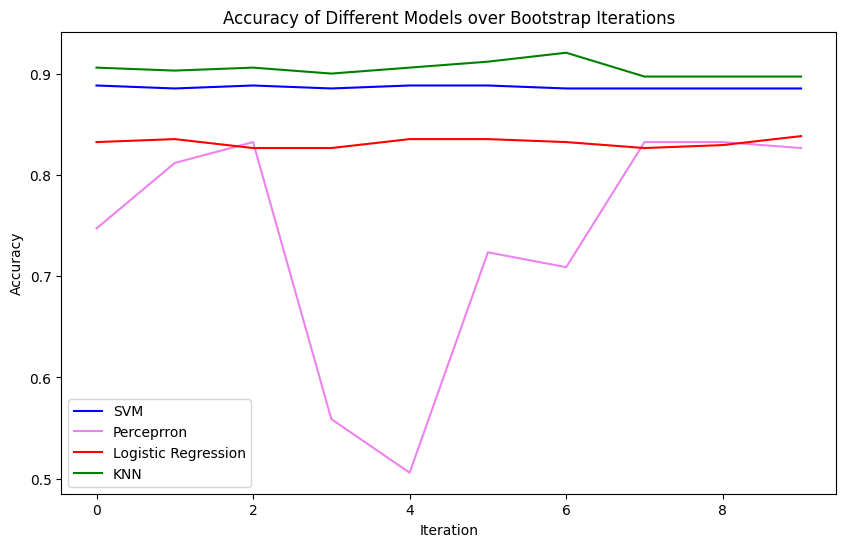

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot( accuracies_score_svm, color='blue', label='SVM')
plt.plot(accuracies_score_per,color='violet',label='Perceprron')
plt.plot(accuracies_score_lr, color='red', label='Logistic Regression')
plt.plot(accuracies_score_knn, color='green', label='KNN')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models over Bootstrap Iterations')
plt.legend()
plt.show()